#### Dataset

In [2]:
# Dataset: SMSSPAMCollection
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import pandas as pd
import seaborn as sns
import nltk

#### Read the data

In [8]:
df = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label','text'])

In [9]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### Separate the input and output data

In [12]:
x = df['text']
y = df['label']

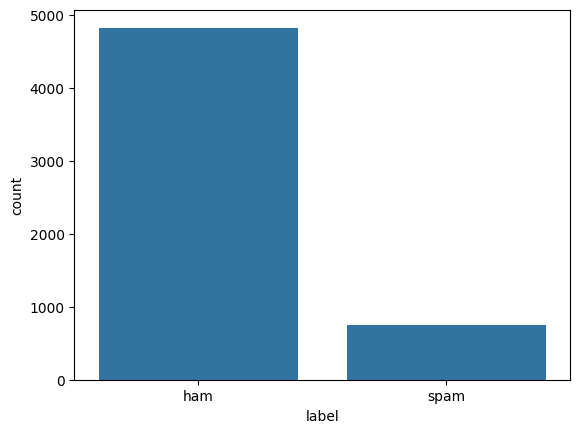

In [13]:
sns.countplot(x = y);

In [14]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt

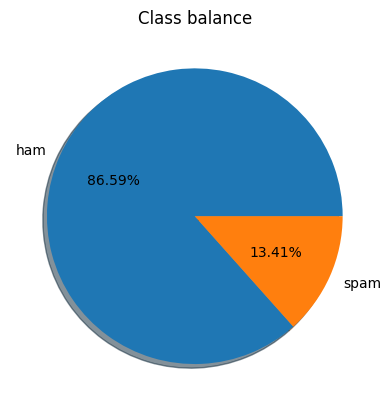

In [25]:
plt.title('Class balance')
plt.pie(y.value_counts(), labels=['ham','spam'], 
        autopct='%2.2f%%', shadow=True);

#### Clean the text

In [27]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag

In [28]:
swords = stopwords.words('english')
ps = PorterStemmer()

In [31]:
def clean_text(text):
    # Tokenize
    tokens1 = word_tokenize(text)
    # Remove punctuations
    tokens2 = [x for x in tokens1 if x.isalpha()]
    # Remove stopwords
    tokens3 = [x.lower() for x in tokens2 if x.lower() not in swords]
    # Apply stemming
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

In [32]:
sent = 'Hello friends! How are you? I hope, you like Python Programming.'

In [33]:
clean_text(sent)

['hello', 'friend', 'hope', 'like', 'python', 'program']

In [34]:
x.apply(lambda x: clean_text(x))

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

#### TF*IDF Vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [38]:
x_new = tfidf.fit_transform(x)

In [39]:
x_new.shape

(5572, 5925)

In [41]:
x_new.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zyada', 'é', 'ü'], dtype=object)

In [43]:
len(tfidf.get_feature_names_out())

5925

#### Cross Validation

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [46]:
x_train.shape

(4179, 5925)

In [47]:
x_test.shape

(1393, 5925)

#### Build the model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
clf = RandomForestClassifier(random_state=0)

In [51]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

#### Performance Evaluation

In [53]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [55]:
y_pred = clf.predict(x_test)

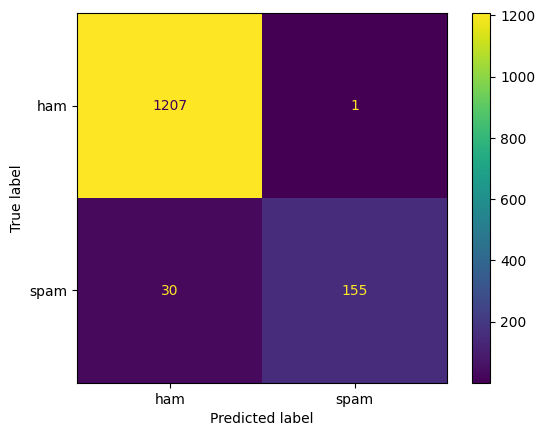

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [57]:
accuracy_score(y_test, y_pred)

0.9777458722182341

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.84      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



#### Prediction of new data

In [60]:
# Sample.csv
# https://mitu.co.in/dataset

In [62]:
new = pd.read_csv('sample.csv', sep='\t', names = ['text'])

In [63]:
new

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [68]:
clf.predict(tfidf.transform(new['text']))

array(['ham', 'spam', 'ham'], dtype=object)

In [ ]:
!pip install keras tensorflow